**Exercise 1**

In [1]:
import cv2
import matplotlib.pyplot as plt 

In [45]:
def display_image(title, image):
    plt.figure(figsize=(4,4))
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

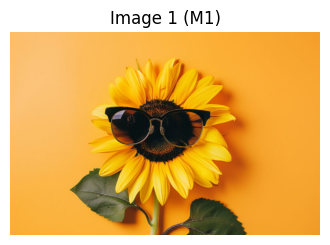

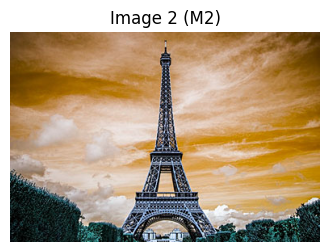

In [47]:
M1 = cv2.imread('image1.jpg')
M2 = cv2.imread('image2.jpg')

M1_rgb = cv2.cvtColor(M1, cv2.COLOR_BGR2RGB)
M2_rgb = cv2.cvtColor(M2, cv2.COLOR_BGR2RGB)
display_image('Image 1 (M1)', M1_rgb)
display_image('Image 2 (M2)', M2)

In [14]:
height, width, _ = M1.shape
M2_resized = cv2.resize(M2, (width, height))

print(M1.shape, M2_resized.shape)

(525, 800, 3) (525, 800, 3)


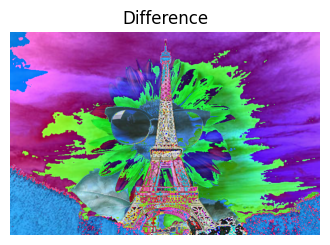

In [19]:
# compute the pixel-wise difference between the two images
difference = M1 - M2_resized
display_image('Difference', difference)

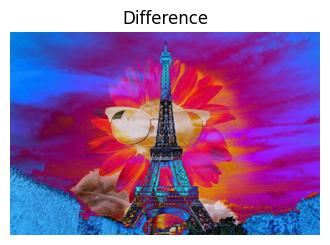

In [17]:
absolute_difference = cv2.absdiff(M1, M2_resized)
display_image('Difference', absolute_difference)

**Exercise 2**

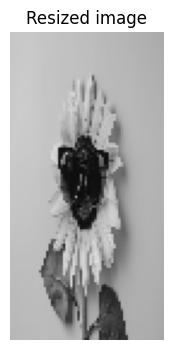

In [30]:
# Preprocess the Data (64 x 128)
image = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (64, 128))

image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
display_image('Resized image', image_rgb)

In [31]:
# Calculating Gradients (direction x and y)
grad_x = cv2.Sobel(image_resized, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(image_resized, cv2.CV_64F, 0, 1, ksize=3)

# display_image('Gradient along x direction', grad_x)
# display_image('Gradient along y direction', grad_y)

In [32]:
# Calculate the Magnitude and Orientation
magnitude = cv2.magnitude(grad_x, grad_y)
orientation = cv2.phase(grad_x, grad_y, angleInDegrees=True)

# display_image('Magnitude', magnitude)
# display_image('Orientation', orientation)

In [36]:
import numpy as np
# Calculate Histogram of Gradients in 8×8 cells
cell_size = 8
num_cells_x = image_resized.shape[1] // cell_size
num_cells_y = image_resized.shape[0] // cell_size
bins = 9
# Initialize HOG features array
hog_features = []

for i in range(num_cells_y):
    for j in range(num_cells_x):
        # Extract cell magnitude and orientation
        cell_magnitude = magnitude[i*cell_size:(i+1)*cell_size, j*cell_size:(j+1)*cell_size]
        cell_orientation = orientation[i*cell_size:(i+1)*cell_size, j*cell_size:(j+1)*cell_size]

        # Create histogram for the cell
        hist, _ = np.histogram(
            cell_orientation,
            bins=bins,
            range=(0, 180),
            weights=cell_magnitude
        )
        hog_features.extend(hist)

# Step 5: Normalize gradients in 16x16 blocks
# Here we will take 2x2 cells (16x16 pixels) for normalization

block_size = 2  # Block of 2x2 cells
block_stride = 1  # Sliding by 1 cell at a time

# Convert hog_features to a numpy array for easier block-wise manipulation
hog_features = np.array(hog_features)
hog_feature_blocks = []

for i in range(0, num_cells_y - block_size + 1, block_stride):
    for j in range(0, num_cells_x - block_size + 1, block_stride):
        # Extract the 2x2 block of cells
        block = hog_features[
            (i*num_cells_x + j) * bins: (i*num_cells_x + j + block_size) * bins * block_size
        ]
        
        # Normalize the block
        norm_block = block / (np.linalg.norm(block) + 1e-6)
        hog_feature_blocks.extend(norm_block)

# Step 6: Features for the complete image
hog_features_vector = np.array(hog_feature_blocks)

print("HOG feature vector for the complete image:", hog_features_vector)
print("Feature vector length:", len(hog_features_vector))

HOG feature vector for the complete image: [0.18253228 0.02455263 0.05046745 ... 0.         0.         0.01039168]
Feature vector length: 33957


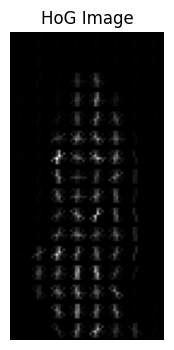

In [35]:
# Features for the complete image
from skimage.feature import hog

hog_features, hog_image = hog(
    image_resized,
    orientations=9,           # Number of orientation bins
    pixels_per_cell=(8, 8),    # 8x8 cells
    cells_per_block=(2, 2),    # 16x16 block normalization
    block_norm='L2-Hys',
    visualize=True,
    feature_vector=True
)
display_image('HoG Image', hog_image)